## Install Dependencies

In [2]:
# --- Installs ---

!pip install --upgrade torch
!pip install --upgrade torchvision
!pip install --upgrade scanpy
!pip install adjustText
!pip install igraph
!pip install louvain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for louvain: filename=louvain-0.8.2-cp312-cp312-linux_x86_64.whl size=971849 sha256=2ac74e8cdbac354b14c080514cec020eea10fa3d349608accf54e1a462819638
  Stored in directory: /root/.cache/pip/wheels/40/de/2b/bb7ed19d84727f9f299f20cd34c42bba9c8bef7d83d2255c86
Successfully built louvain


In [3]:
# --- Imports ---

import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [4]:
# --- Read H5AD data ---

# Concatenated AnnData (Query Embeddings AnnData + Reference Embeddings AnnData)
# adata_concat = sc.read('/content/drive/MyDrive/Work/scGPT-MAFLD/query_ref_concat.h5ad')

# Query Embeddings AnnData
query_embed_adata = sc.read_h5ad('/content/drive/MyDrive/projects/scGPT-MAFLD/data/query_embed.h5ad')

In [5]:
print(query_embed_adata)

AnnData object with n_obs × n_vars = 8310 × 1353
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'celltype_true'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank', 'id_in_vocab'
    obsm: 'X_emb', 'X_pca', 'X_scGPT', 'X_umap'
    varm: 'PCs'


## Visualise Embeddings with UMAPs

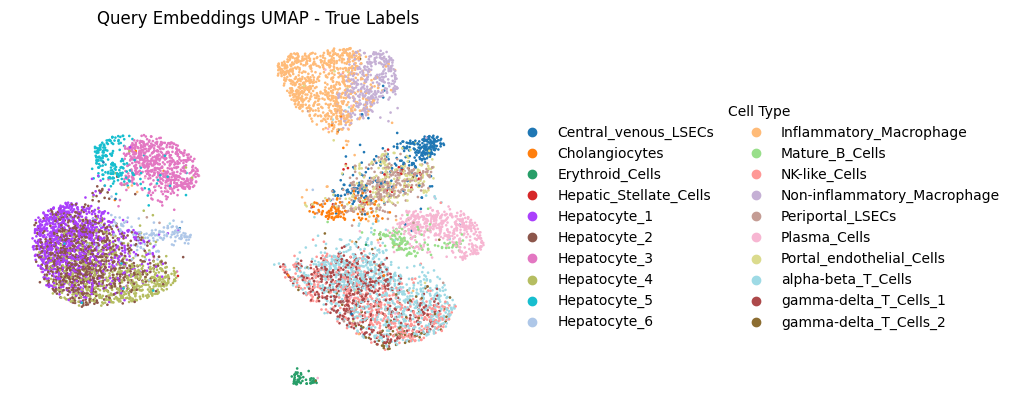

In [11]:
# --- Compute neighborhood graph and UMAP ---

cell_type_key = "celltype.l2" # change to "celltype_true" for query cells

# Compute neighbors and UMAP using scGPT embeddings
sc.pp.neighbors(query_embed_adata, use_rep="X_scGPT")
sc.tl.umap(query_embed_adata)

# Plot UMAP
sc.pl.umap(
    query_embed_adata,
    color="celltype_true",
    legend_loc="right margin",  # place legend outside the plot
    title="Query Embeddings UMAP - True Labels",
    frameon=False,
    show=False
)

# Access the current figure and change the legend title
plt.gca().get_legend().set_title("Cell Type")

plt.savefig("/content/drive/MyDrive/projects/scGPT-MAFLD/plots/query_embeddings_umap.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()